In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = 'global_data_10_1'
time_bins = np.arange(0,24,float(file.split('_')[-1]))
H_bins = np.arange(90,130,float(file.split('_')[-2]))

shape = len(time_bins) * len(H_bins)

file_path = f'../../Results/{file}.csv'

In [3]:
data_df = pd.read_csv(file_path,low_memory=False)
Ne_EXP = np.array(data_df['EXP Density']).reshape(-1,shape)
dNe_EXP =  np.array(data_df['EXP Density Error']).reshape(-1,shape)
Ne_WACCM = np.array(data_df['WACCM Density']).reshape(-1,shape)
mag_EXP = np.array(data_df['EXP Magnitude']).reshape(-1,shape)
mag_WACCM = np.array(data_df['WACCM Magnitude']).reshape(-1,shape)
height = np.array(data_df['Height']).reshape(-1,shape)
Date = np.array(data_df['Date']).reshape(-1,shape)[:,0]
Svalbard = np.array(data_df ['Svalbard']).reshape(-1,shape)[:,0] == 1
Tromso = np.array(data_df['Tromso']).reshape(-1,shape)[:,0] == 1
Geomagnetic_Event = np.array(data_df['Geomagnetic Event']).reshape(-1,shape)[:,0] == 1
Solar_Proton_Event = np.array(data_df['Solar Proton Event']).reshape(-1,shape)[:,0] == 1
hp30_index = np.array(data_df['Hp30 Index']).reshape(-1,shape)
dhp30_index = np.array(data_df['Hp30 Index Gradient']).reshape(-1,shape)

mask = np.repeat(True, len(Ne_EXP))
#mask = Svalbard
#mask = Tromso
#mask = Geomagnetic_Event
#mask = Solar_Proton_Event
#mask = (~Geomagnetic_Event) * (~Solar_Proton_Event)
#mask = (Geomagnetic_Event) + (Solar_Proton_Event)

Ne_EXP = Ne_EXP[mask]
dNe_EXP = dNe_EXP[mask]
Ne_WACCM = Ne_WACCM[mask]

mag_EXP = mag_EXP[mask]
mag_WACCM = mag_WACCM[mask]

hp30_index = hp30_index[mask]
dhp30_index = dhp30_index[mask]
height = height[mask]

Geomagnetic_Event = Geomagnetic_Event[mask]
Solar_Proton_Event = Solar_Proton_Event[mask]

zero_mask = Ne_EXP != 0
Ne_EXP[~zero_mask] = 1
Ne_WACCM[~zero_mask] = 1
mag_EXP[~zero_mask] = 1
mag_WACCM[~zero_mask] = 1
height[~zero_mask] = 0

Ne_diff = np.abs(Ne_EXP - Ne_WACCM)
error_mask = Ne_diff < dNe_EXP
count_error = np.sum(Ne_EXP != 1, axis=0)

Ne_EXP[error_mask] = 1
dNe_EXP[error_mask] = 0
Ne_WACCM[error_mask] = 1
mag_EXP[error_mask] = 1
mag_WACCM[error_mask] = 1
height[error_mask] = 0

dNe_fac = dNe_EXP/Ne_EXP
factor_error_mask = dNe_fac > 2
dNe_EXP_2 = dNe_fac

Ne_EXP[factor_error_mask] = 1
dNe_EXP[factor_error_mask] = 0
dNe_fac[factor_error_mask] = 0
Ne_WACCM[factor_error_mask] = 1
mag_EXP[factor_error_mask] = 1
mag_WACCM[factor_error_mask] = 1
height[factor_error_mask] = 0

zero_mask = Ne_EXP != 0
Ne_EXP[~zero_mask] = 1
dNe_fac[~zero_mask] = 0
Ne_WACCM[~zero_mask] = 1
mag_EXP[~zero_mask] = 1
mag_WACCM[~zero_mask] = 1
height[~zero_mask] = 0

value_mask = Ne_EXP != 1

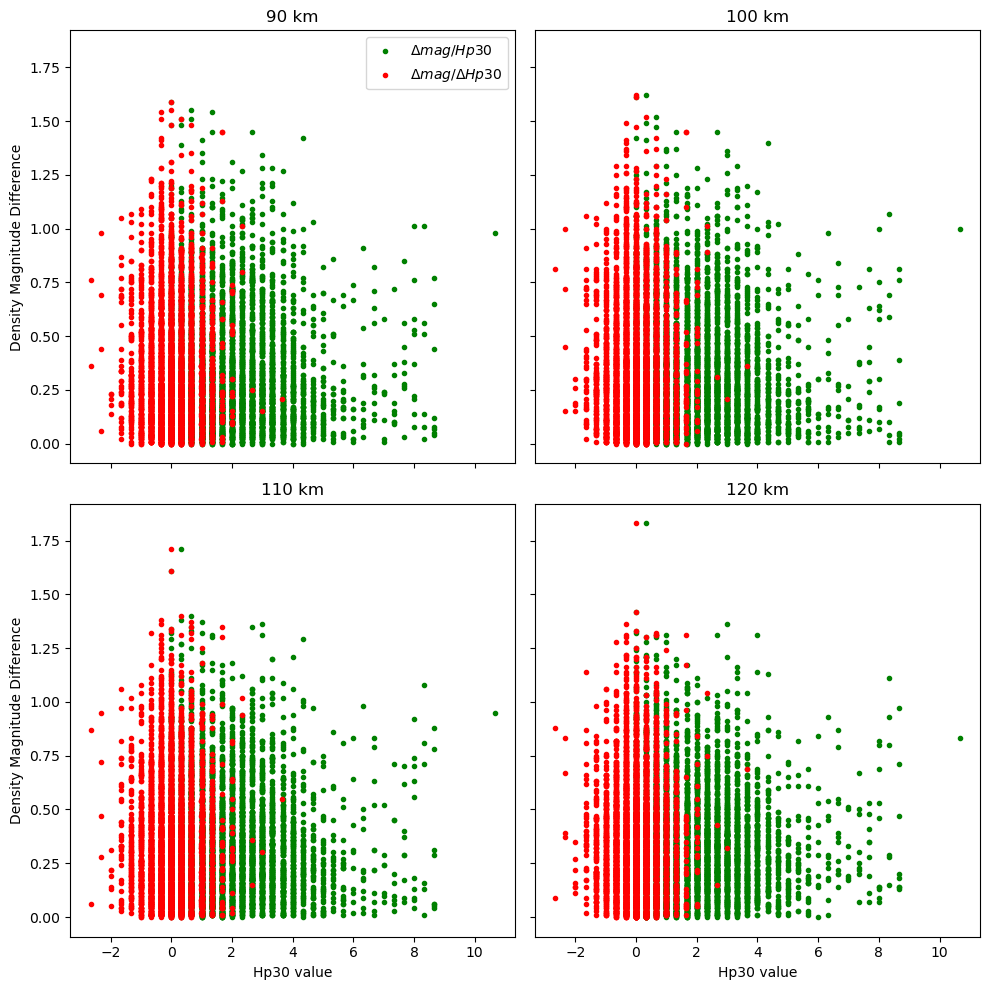

In [6]:
zero_mask = height != 0

height_flat = height[zero_mask]
hp30_flat = hp30_index[zero_mask]
dhp30_flat = dhp30_index[zero_mask]
Ne_diff_flat = np.abs(mag_EXP - mag_WACCM)[zero_mask]

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

index = 0
for H_bin in H_bins:
    h_mask = height_flat == H_bin
    axs[index // 2][index % 2].scatter(hp30_flat[h_mask], Ne_diff_flat[h_mask], marker = '.', color = 'g', label = r'$\Delta mag / Hp30$')
    axs[index // 2][index % 2].scatter(dhp30_flat[h_mask], Ne_diff_flat[h_mask], marker = '.', color = 'r', label = r'$\Delta mag / \Delta Hp30$')
    axs[index // 2][index % 2].set_title(f'{int(H_bin)} km')
    index += 1

axs[-1][0].set_xlabel('Hp30 value')
axs[-1][1].set_xlabel('Hp30 value')

axs[0][0].set_ylabel('Density Magnitude Difference')
axs[1][0].set_ylabel('Density Magnitude Difference')

axs[0][0].legend(loc='upper right')
plt.tight_layout()
plt.show()